<a href="https://colab.research.google.com/github/yash-3/machine-learning/blob/main/Customers_Segment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task:** Analyse the income earned vs income spent for the customers. 

In [1]:
import numpy as np      #To Prform Numerical Operation
import matplotlib.pyplot as plt   #plot something 
import pandas as pd     #To Play With Dataset

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, auc, roc_curve

In [2]:
from google.colab import drive  #import gogle drive data

In [3]:
drive.mount('/content/drive') # mount drive data into colab cloud and enter authentication code

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
cd /content/drive/"My Drive/Colab Notebooks/Dataset Files"  

/content/drive/My Drive/Colab Notebooks/Dataset Files


In [5]:
dataset=pd.read_csv("ESE_Question_2.csv")
print(dataset)
dataset.shape

     INCOME  SPEND
0       233    150
1       250    187
2       204    172
3       236    178
4       354    163
..      ...    ...
298     241    123
299     264    132
300     193    141
301     131    115
302     236    174

[303 rows x 2 columns]


(303, 2)

In [6]:
dataset.describe()

,INCOME,SPEND
count,303.000000,303.000000
mean,245.273927,149.646865
std,48.499412,22.905161
min,126.000000,71.000000
25%,211.000000,133.500000
50%,240.000000,153.000000
75%,274.000000,166.000000
max,417.000000,202.000000


In [7]:
income = dataset['INCOME']
spend = dataset['SPEND']

Text(0.5, 1.0, 'Income Vs Spend')

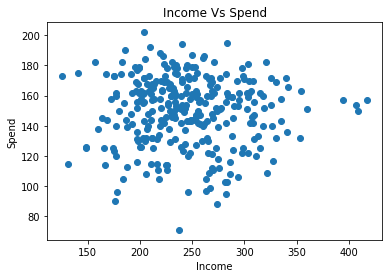

In [8]:
plt.scatter(income,spend)
plt.xlabel("Income")
plt.ylabel("Spend")
plt.title("Income Vs Spend")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Income Distribution')

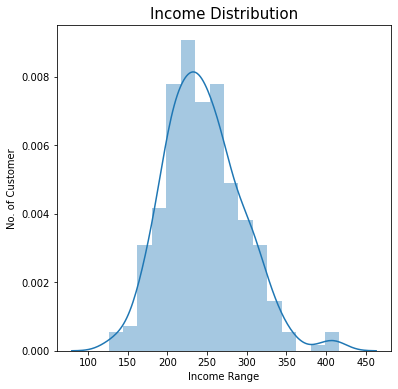

In [9]:
# Visulize Income vs No. of customer
import seaborn as sns
plt.rcParams['figure.figsize'] = (6,6)
sns.distplot(dataset['INCOME'])
plt.xlabel('Income Range')
plt.ylabel('No. of Customer')
plt.title('Income Distribution', fontsize = 15)

From graph we can conclude that, Major number of Customers having Income range  in between 200 to 270.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Money Spend Distribution')

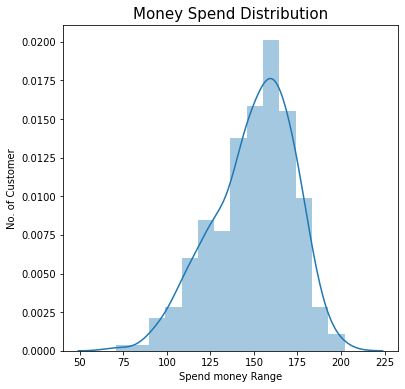

In [10]:
# Visulize Spend vs No. of customer
import seaborn as sns
plt.rcParams['figure.figsize'] = (6,6)
sns.distplot(dataset['SPEND'])
plt.xlabel('Spend money Range')
plt.ylabel('No. of Customer')
plt.title('Money Spend Distribution', fontsize = 15)

From graph we can conclude that, Major number of Customers have spend money in range of 140 to 170.

In [11]:
#Apply Clustering Algorithms for segment customers.

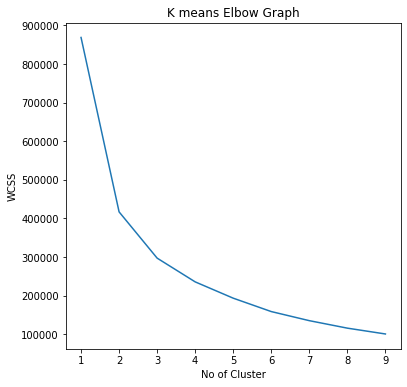

In [12]:
from sklearn.cluster import KMeans

data = dataset.iloc[:, [0,1]].values
wcss=[]
for i in range(1,10):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)        #residual values which we are having.
plt.plot(range(1,10),wcss)
plt.title('K means Elbow Graph')
plt.xlabel('No of Cluster')
plt.ylabel('WCSS')
plt.show()

In [13]:
kmeans = KMeans(n_clusters=4,init='k-means++',random_state=0)
y_kmeans = kmeans.fit_predict(data)

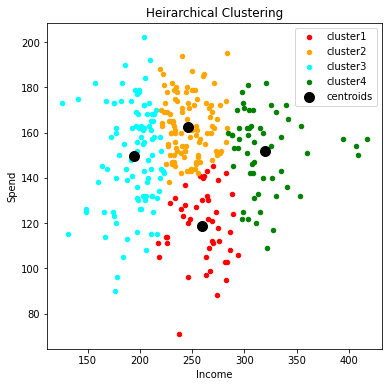

In [14]:
#visualizing the Cluster
plt.scatter(data[y_kmeans==0,0],data[y_kmeans==0,1],s=20,c='red',label='cluster1')
plt.scatter(data[y_kmeans==1,0],data[y_kmeans==1,1],s=20,c='orange',label='cluster2')
plt.scatter(data[y_kmeans==2,0],data[y_kmeans==2,1],s=20,c='cyan',label='cluster3')
plt.scatter(data[y_kmeans==3,0],data[y_kmeans==3,1],s=20,c='green',label='cluster4')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='black',label='centroids')

plt.title('Heirarchical Clustering')
plt.xlabel('Income')
plt.ylabel('Spend')
plt.legend()  
plt.show()

From clustering we can observe that,

**1.** Cluster1 people believes in keeping their money secured. They have good amount of income but they spend less.

**2.** Cluster2 people are blessed with living in the lap of luxury. they have high income and they spend more.

**3.** Cluster1 people having less income but most of are spending more money rather than saving. they are living the luxurious life despite having low income.

**4.** Cluster4 people have highest range of income along with that they spend money for future and save some money as well..
